<a href="https://colab.research.google.com/github/jigsawanku/IPL-T20-CRICKET-ANALYSIS/blob/main/Ankit_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [ ]:
# Mounting drive to import Dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Liberaries which will be used further to explore the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the datasets with help of Panda Library
Deliveries = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/deliveries.csv")
Players = pd.read_excel("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/Players.xlsx",parse_dates=True)
Matches = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/matches.csv")
Most_runs = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/most_runs_average_strikerate.csv")
Teams = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/teams.csv")
Teams_home_away = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/teamwise_home_and_away.csv")

In [ ]:
# Data cleaning of all the imported datasets one by one

## **Data Cleaning**

In [ ]:
#Checking the total number rows and columns in the dataset
Deliveries.shape

(179078, 21)

In [ ]:
# Getting the initial information of the dataset

Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# checking the total number of missing values available in each variable
Deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
# Converting the total number of missing values available in each variable into percentage
Deliveries_null_perctange = Deliveries.isnull().sum()/Deliveries.shape[0]*100
Deliveries_null_perctange

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [ ]:
drop_column = Deliveries_null_perctange[Deliveries_null_perctange>20].keys()
drop_column

Index(['player_dismissed', 'dismissal_kind', 'fielder'], dtype='object')

In [ ]:
# Dropping the columns which has more than 20% of missing values
Deliveries_without_null = Deliveries.drop(columns=drop_column)
Deliveries_without_null.shape

(179078, 18)

In [ ]:
# Now checkinh the percentage of missing values
Deliveries_without_null_perctange = Deliveries_without_null.isnull().sum()/Deliveries_without_null.shape[0]*100


In [ ]:
Deliveries_without_null_perctange

match_id         0.0
inning           0.0
batting_team     0.0
bowling_team     0.0
over             0.0
ball             0.0
batsman          0.0
non_striker      0.0
bowler           0.0
is_super_over    0.0
wide_runs        0.0
bye_runs         0.0
legbye_runs      0.0
noball_runs      0.0
penalty_runs     0.0
batsman_runs     0.0
extra_runs       0.0
total_runs       0.0
dtype: float64

In [ ]:
Deliveries_without_null.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
# Getting the unique values of all the categoricals variables which  has less than 20 unique values
unique_list_long = []
unique_list_short = []

for col in Deliveries_without_null.columns:
  
  uni_list = len(Deliveries_without_null[col].unique())
  if uni_list>20:
    unique_list_long.append('unique_elements of '+col+' is '+ str(Deliveries_without_null[col].unique()))
  else:
    unique_list_short.append('unique_elements of '+col+' is '+ str(Deliveries_without_null[col].unique()))
print(unique_list_short)


['unique_elements of inning is [1 2 3 4 5]', "unique_elements of batting_team is ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'\n 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'\n 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'\n 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'\n 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']", "unique_elements of bowling_team is ['Royal Challengers Bangalore' 'Sunrisers Hyderabad'\n 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'\n 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'\n 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'\n 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'\n 'Delhi Capitals']", 'unique_elements of over is [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]', 'unique_elements of ball is [1 2 3 4 5 6 7 8 9]', 'unique_elements of is_super_over is [0 1]', 'unique_elements of wide_runs is [0 2 1 5 3 4]

In [ ]:
# The below code is not related to this analysis but an experiment done before to get the above results
unique_list_col = []
unique_list_avoid = []
for col in Deliveries_without_null.columns:
  uni_list = len(Deliveries_without_null[col].unique())
  if uni_list<=20:
    unique_list_col.append(col)
  else:
    unique_list_avoid.append(col)
  
print(unique_list_col)

['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']


In [ ]:
# checking the unique values in individual columns
Deliveries_without_null['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
# In the above code we find that there are two variables named "Rising Pune Supergiant" with the difference 's' at the end so we combined them as one with "Rising Pune Supergiants"
Deliveries_without_null.loc[Deliveries_without_null['batting_team'] == 'Rising Pune Supergiant', ['batting_team']] = 'Rising Pune Supergiants'
Deliveries_without_null['batting_team'].unique()


array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [ ]:
# again checking the unique values in individual columns
Deliveries_without_null['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [ ]:
# In the above code we find that there are two variables named "Rising Pune Supergiant" with the difference 's' at the end so we combined them as one with "Rising Pune Supergiants"
Deliveries_without_null.loc[Deliveries_without_null['bowling_team'] == 'Rising Pune Supergiant', ['bowling_team']] = 'Rising Pune Supergiants'
Deliveries_without_null['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Delhi Capitals'], dtype=object)

In [ ]:
# Creating list of all the unique teams
list_teams = list(Deliveries_without_null['batting_team'].unique())

In [ ]:
#  Checking the length of list
len(list_teams)

14

In [ ]:
# again exploring the Deliveries dataset information after data cleaning.
Deliveries_without_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

In [ ]:
Deliveries_without_null.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
# Creating copy of the dataset with named as 'final_deli'
final_deli = Deliveries_without_null.copy()
final_deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

#Players Dataset




In [ ]:
Players = pd.read_excel("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/Players.xlsx")

In [ ]:
#Checking the total number rows and columns in the dataset
Players.shape

(566, 5)

In [ ]:
# Getting the initial information of the dataset
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [ ]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [ ]:
# Checking total number of missing values in each variable
Players.isnull().sum()

Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

In [ ]:
# Getting total number of missing values in each variable in percentage
Players_null_perctange = Players.isnull().sum()/Players.shape[0]*100
Players_null_perctange

Player_Name       0.000000
DOB              16.784452
Batting_Hand      0.530035
Bowling_Skill    11.307420
Country          16.784452
dtype: float64

In [ ]:
Players_null_perctange.reset_index()

,index,0
0,Player_Name,0.000000
1,DOB,16.784452
2,Batting_Hand,0.530035
3,Bowling_Skill,11.307420
4,Country,16.784452


In [ ]:
# Inporting Datetime library to play with date time variable
import datetime

In [ ]:
# Creating another column in dataset named as 'birth_year' to extract only year from DOB variable
Players['birth_year'] = pd.DatetimeIndex(Players['DOB']).year


In [ ]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,birth_year
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,1991.0
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,1983.0
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,1977.0
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN,NaN


In [ ]:
# Imputing missing values to 'birth_year' with mode of that variable
Players['birth_year'] = Players['birth_year'].fillna(Players['birth_year'].mode()[0])

In [ ]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,birth_year
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,1991.0
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,1983.0
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,1977.0
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN,1984.0
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN,1984.0


In [ ]:
type(Players.DOB[3])

pandas._libs.tslibs.nattype.NaTType

In [ ]:
# now imputing the missing valus in DOB variable with imputed values of birth_year year as general date because we can't put speacific DOB for the missing values in DOB
mode_date = pd.to_datetime('1984-01-01')
Players['DOB'] = Players['DOB'].fillna(mode_date)

In [ ]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,birth_year
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,1991.0
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,1983.0
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,1977.0
3,A Choudhary,1984-01-01,Right_hand,Left-arm fast-medium,NaN,1984.0
4,A Dananjaya,1984-01-01,Right_Hand,Right-arm offbreak,NaN,1984.0


In [ ]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            566 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
 5   birth_year     566 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 26.7+ KB


In [ ]:
# Coverting datatype for birth_year variable into 'int' type.
Players['birth_year']=Players['birth_year'].astype(int)

In [ ]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            566 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
 5   birth_year     566 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 26.7+ KB


In [ ]:
# Now collecting all the categorical variables in another variable
cat_vars = Players.select_dtypes(include='object')
cat_vars.head()

,Player_Name,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,Right_Hand,Right-arm medium,India
1,A Chandila,Right_Hand,Right-arm offbreak,India
2,A Chopra,Right_Hand,Right-arm offbreak,India
3,A Choudhary,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,Right_Hand,Right-arm offbreak,NaN


In [ ]:
# getting the percentage of missing values of the categorical variable by assining them into another variable
isnull_per=cat_vars.isnull().mean()*100
isnull_per

Player_Name       0.000000
Batting_Hand      0.530035
Bowling_Skill    11.307420
Country          16.784452
dtype: float64

In [ ]:
# assining all the categorical values which has missing values into another variable
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['Batting_Hand', 'Bowling_Skill', 'Country'], dtype='object')

In [ ]:
# imputing all the missing values in categorical variable with mode value of each variable by using for loop and printing the values that are imputed at the end
cat_vars_copy= cat_vars.copy()

for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

Batting_Hand = Right_Hand
Bowling_Skill = Right-arm medium
Country = India


In [ ]:
# Again checking the number of missing values in categorical variable
cat_vars_copy.isnull().sum().sum()

0

In [ ]:
# update those imputed values in the original dataset for further exploration
Players.update(cat_vars_copy)

In [ ]:
Players.isnull().sum()

Player_Name      0
DOB              0
Batting_Hand     0
Bowling_Skill    0
Country          0
birth_year       0
dtype: int64

In [ ]:
# Getting the unique values of each categorical values 
unique_list_long_players = []
unique_list_short_players = []

for col in cat_vars_copy.columns:
  
  uni_list = len(cat_vars_copy[col].unique())
  if uni_list>20:
    unique_list_long_players.append('unique_elements of '+col+' is '+ str(cat_vars_copy[col].unique()))
  else:
    unique_list_short_players.append('unique_elements of '+col+' is '+ str(cat_vars_copy[col].unique()))
print(unique_list_short_players)

["unique_elements of Batting_Hand is ['Right_Hand' 'Right_hand' 'Left_Hand']", "unique_elements of Bowling_Skill is ['Right-arm medium' 'Right-arm offbreak' 'Left-arm fast-medium'\n 'Right-arm fast-medium' 'Right-arm fast' 'Legbreak googly' 'Legbreak'\n 'Left-arm medium-fast' 'Slow left-arm orthodox' 'Right-arm medium-fast'\n 'Left-arm medium' 'Left-arm fast' 'Slow left-arm chinaman'\n 'Right-arm bowler' 'Right-arm Medium' 'Right-arm Fast']", "unique_elements of Country is ['India' 'England' 'South Africa' 'Australia' 'Bangladesh' 'Sri Lanka'\n 'West Indies' 'New Zealand' 'Pakistan' 'Netherlands' 'Zimbabwea']"]


In [ ]:
# We observed the variable "Batting_Hand" has two similar values Right_hand and Right_Hand so we convert both as Right_Hand
cat_vars_copy.loc[cat_vars_copy['Batting_Hand'] == 'Right_hand', ['Batting_Hand']] = 'Right_Hand'
cat_vars_copy['Batting_Hand'].unique()

array(['Right_Hand', 'Left_Hand'], dtype=object)

In [ ]:
cat_vars_copy['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler', 'Right-arm Medium',
       'Right-arm Fast'], dtype=object)

In [ ]:
# Similarly we applying the same procedure as applied for above feature
cat_vars_copy.loc[cat_vars_copy['Bowling_Skill'] == 'Right-arm fast-medium', ['Bowling_Skill']] = 'Right-arm medium-fast'
cat_vars_copy.loc[cat_vars_copy['Bowling_Skill'] == 'Left-arm fast-medium', ['Bowling_Skill']] = 'Left-arm medium-fast'
cat_vars_copy.loc[cat_vars_copy['Bowling_Skill'] == 'Right-arm Medium', ['Bowling_Skill']] = 'Right-arm medium'
cat_vars_copy.loc[cat_vars_copy['Bowling_Skill'] == 'Right-arm Fast', ['Bowling_Skill']] = 'Right-arm fast'
cat_vars_copy.loc[cat_vars_copy['Bowling_Skill'] == 'Right-arm bowler', ['Bowling_Skill']] = 'Right-arm offbreak'
cat_vars_copy['Bowling_Skill'].unique()



array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm medium-fast',
       'Right-arm medium-fast', 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Slow left-arm orthodox', 'Left-arm medium',
       'Left-arm fast', 'Slow left-arm chinaman'], dtype=object)

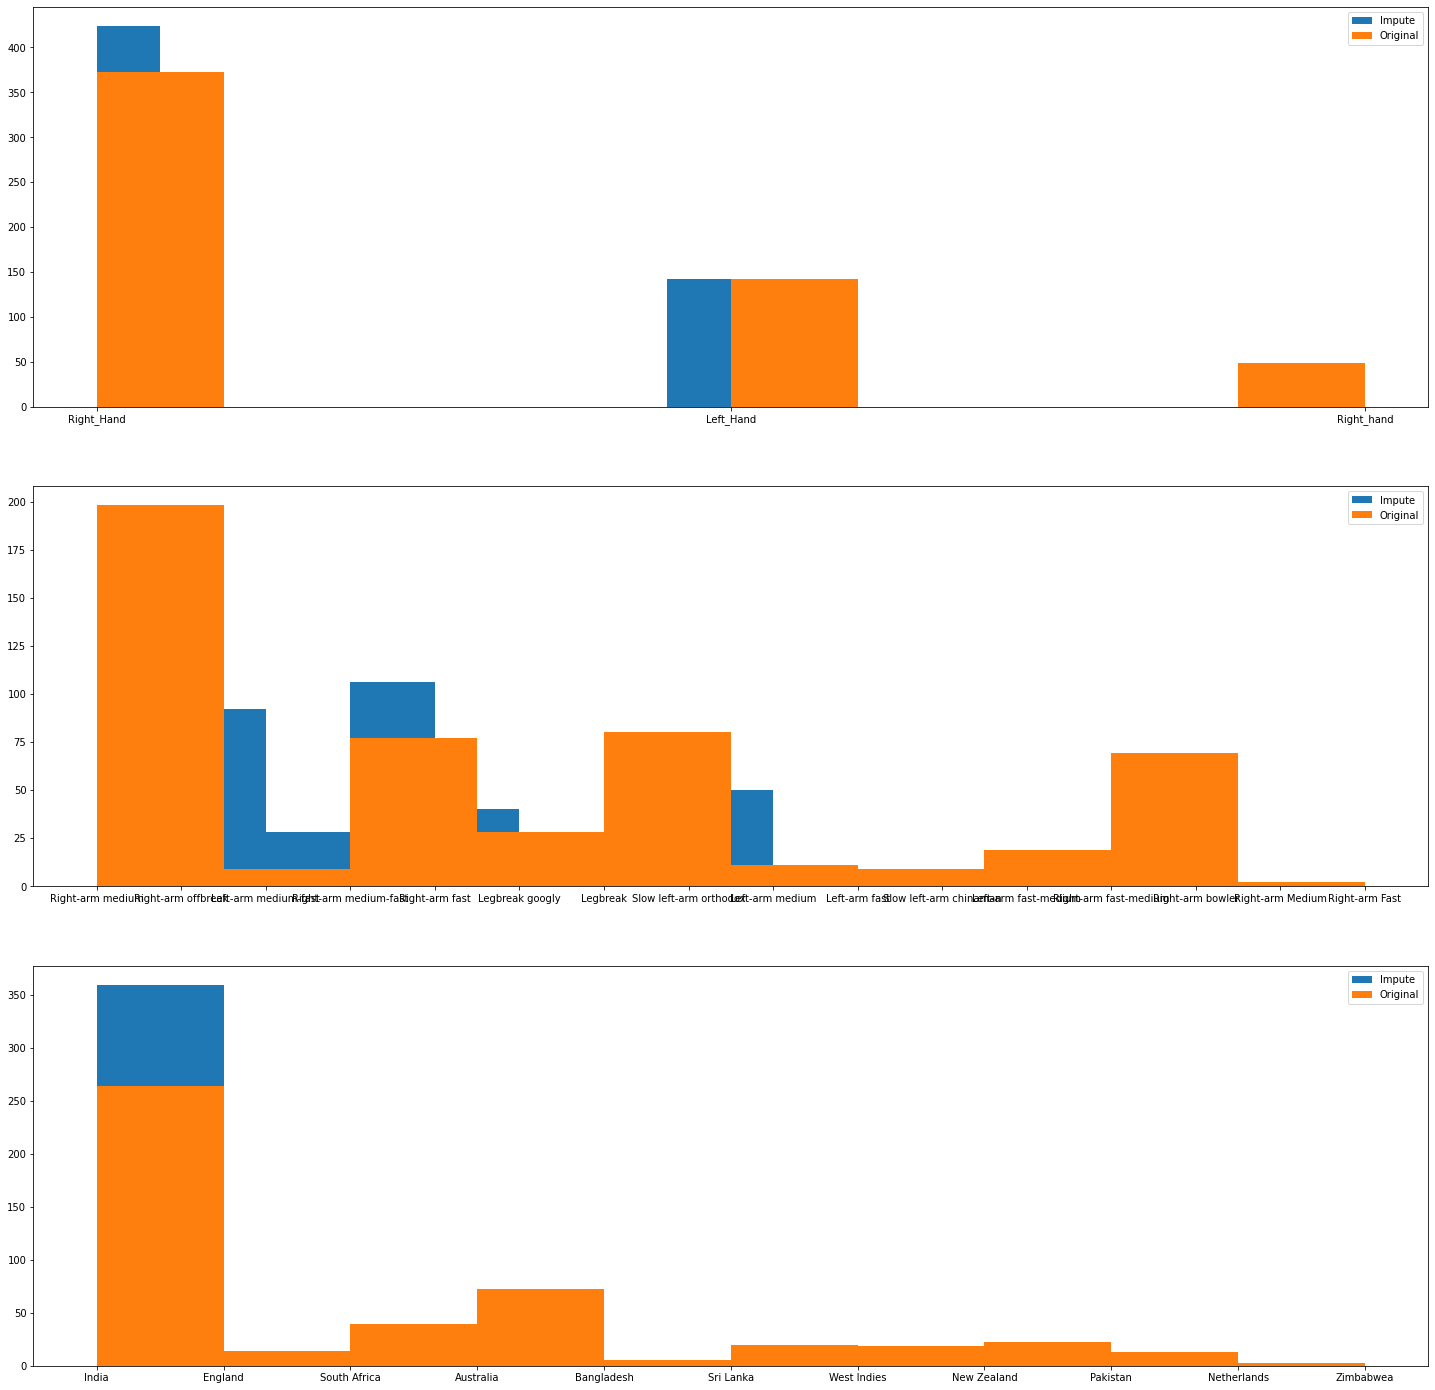

In [ ]:
# comparing the distribution of data before and after imputing the missing values for the categorical values by usig for loop
plt.figure(figsize=(25,25))
for i,var in enumerate(miss_vars):
    plt.subplot(3,1,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [ ]:
final_players = Players.drop(columns=['birth_year'])
final_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            566 non-null    datetime64[ns]
 2   Batting_Hand   566 non-null    object        
 3   Bowling_Skill  566 non-null    object        
 4   Country        566 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


##Matches

In [ ]:
Matches.shape

(756, 18)

In [ ]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
Matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
Matches_null_perctange = Matches.isnull().sum()/Matches.shape[0]*100
Matches_null_perctange

id                  0.000000
Season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [ ]:
Matches_null_perctange.reset_index()

,index,0
0,id,0.000000
1,Season,0.000000
2,city,0.925926
3,date,0.000000
4,team1,0.000000
5,team2,0.000000
6,toss_winner,0.000000
7,toss_decision,0.000000
8,result,0.000000
9,dl_applied,0.000000


In [ ]:
drop_col_matches = Matches_null_perctange[Matches_null_perctange>20].keys()
drop_col_matches

Index(['umpire3'], dtype='object')

In [ ]:
Matches_with_null = Matches.drop(columns=drop_col_matches)
Matches_with_null.shape

(756, 17)

In [ ]:
cat_vars_matches = Matches_with_null.select_dtypes(include='object')
cat_vars_matches.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
isnull_per= cat_vars_matches.isnull().sum()/cat_vars_matches.shape[0]*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['city', 'winner', 'player_of_match', 'umpire1', 'umpire2'], dtype='object')

In [ ]:
# Experimenting to impute the missing values with mode for that particular variable but with refrence to another categorical variable

# matches_copy = Matches.copy()#Matches[Matches.loc[:,'venue'] == var_class]["city"].mode()
# cat_vars_miss = ['city', 'winner', 'player_of_match', 'umpire1', 'umpire2']
# cat_vars = ['venue','toss_winner','winner','city','city']
# for cat_var, cat_var_miss in zip(cat_vars,cat_vars_miss):
#     for var_class in Matches[cat_var].unique():
#         matches_copy.update(Matches[Matches.loc[:,cat_var] == var_class][cat_var_miss].replace(np.nan,Matches[Matches.loc[:,cat_var] == var_class][cat_var_miss].mode()[0]))

In [ ]:
# Experimenting to impute the missing values with mode for that particular variable but with refrence to another categorical variable


# matches_copy = Matches.copy()
# for var_class in Matches['venue'].unique():
#     matches_copy.update(Matches[Matches.loc[:,'venue'] == var_class]["city"].replace(np.nan,Matches[Matches.loc[:,'venue'] == var_class]["city"].mode()))

In [ ]:
#Matches[Matches.loc[:,'venue'] == var_class]["city"].mode()


In [ ]:
Matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
len(Matches.columns)

18

In [ ]:
Matches_with_null.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [ ]:
# cat_vars_miss = ['city', 'winner', 'player_of_match', 'umpire1', 'umpire2']
# cat_vars = ['venue','toss_winner','winner','city','city']

In [ ]:
# Imputing missing values in categorical values with mode
cat_vars_copy= cat_vars_matches.copy()

for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars_matches[var].mode()[0],inplace=True)
    print(var,"=",cat_vars_matches[var].mode()[0])

city = Mumbai
winner = Mumbai Indians
player_of_match = CH Gayle
umpire1 = HDPK Dharmasena
umpire2 = C Shamshuddin


In [ ]:
cat_vars_copy.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
# Getting all uniques values and stored in couple of list on basis of lenght og unique values
unique_list_long_matches = []
unique_list_short_matches = []

for col in Matches.columns:
  
  uni_list = len(Matches[col].unique())
  if uni_list>20:
    unique_list_long_matches.append('unique_elements of '+col+' is '+ str(Matches[col].unique()))
  else:
    unique_list_short_matches.append('unique_elements of '+col+' is '+ str(Matches[col].unique()))
print(unique_list_short_matches)

["unique_elements of Season is ['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' 'IPL-2011' 'IPL-2012'\n 'IPL-2013' 'IPL-2014' 'IPL-2015' 'IPL-2016' 'IPL-2018' 'IPL-2019']", "unique_elements of team1 is ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'\n 'Rising Pune Supergiant' 'Royal Challengers Bangalore'\n 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'\n 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'\n 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'\n 'Delhi Capitals']", "unique_elements of team2 is ['Royal Challengers Bangalore' 'Rising Pune Supergiant'\n 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'\n 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'\n 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'\n 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']", "unique_elements of toss_winner is ['Royal Challengers Bangalore' 'Rising Pune Supergiant'\n 'Kolkata Knight Riders' 'Kings

In [ ]:
# Again  combining similar data points as one in categorical variable
Matches.loc[Matches['team1'] == 'Rising Pune Supergiant', ['team1']] = 'Rising Pune Supergiants'
Matches.loc[Matches['team2'] == 'Rising Pune Supergiant', ['team2']] = 'Rising Pune Supergiants'
Matches.loc[Matches['toss_winner'] == 'Rising Pune Supergiant', ['toss_winner']] = 'Rising Pune Supergiants'
Matches.loc[Matches['winner'] == 'Rising Pune Supergiant', ['winner']] = 'Rising Pune Supergiants'

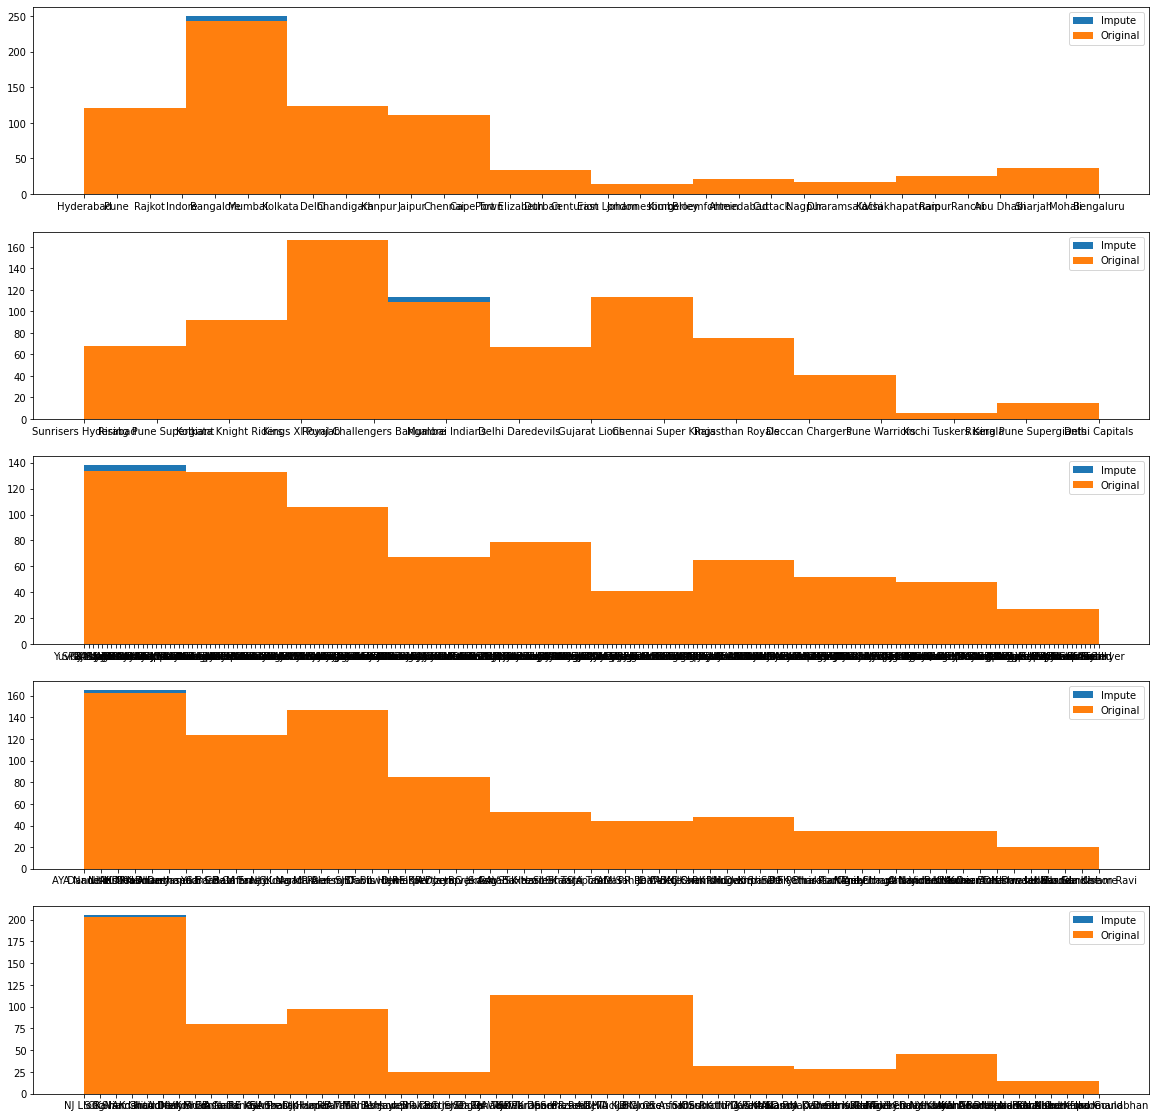

In [ ]:
# Checking the distribution of data with imputed values and without null values
plt.figure(figsize=(20,20))
for i,var in enumerate(miss_vars):
    plt.subplot(5,1,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars_matches[var].dropna(),label="Original")
    plt.legend()

In [ ]:
# Updating those imputed values in the original dataframe
Matches.update(cat_vars_copy)
Matches.drop(columns=drop_col_matches,inplace=True)

In [ ]:
Matches.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
# Storing clean dataframe in another variable named 'finaL_matches'
final_matches = Matches.copy()
final_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(4), object(13)
memory usag

## most runs

In [ ]:
Most_runs = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Python/Capstone for EDA/Datasets/most_runs_average_strikerate.csv")


In [ ]:
Most_runs.shape

(516, 6)

In [ ]:
Most_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
Most_runs.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
Most_runs.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [ ]:
Most_runs_null_perctange = Most_runs.isnull().sum()/Most_runs.shape[0]*100
Most_runs_null_perctange

batsman          0.000000
total_runs       0.000000
out              0.000000
numberofballs    0.000000
average          6.589147
strikerate       0.000000
dtype: float64

In [ ]:
Most_runs_null_perctange.reset_index()

,index,0
0,batsman,0.000000
1,total_runs,0.000000
2,out,0.000000
3,numberofballs,0.000000
4,average,6.589147
5,strikerate,0.000000


In [ ]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [ ]:
# imputing missing values of variable "average" with '0' 
Most_runs['average']=Most_runs['average'].fillna(0)


In [ ]:
Most_runs.isnull().sum()

batsman          0
total_runs       0
out              0
numberofballs    0
average          0
strikerate       0
dtype: int64

In [ ]:
# Storing clean dataframe in another variable named 'final_most_runs'

final_most_runs = Most_runs.copy()
final_most_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        516 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


##Teams home away

In [ ]:
Teams_home_away.shape

(14, 7)

In [ ]:
Teams_home_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [ ]:
# Getting all uniques values for cll the columns
unique_list_long_teams_ha = []
unique_list_short_teams_ha = []

for col in Teams_home_away.columns:
  
  uni_list = len(Teams_home_away[col].unique())
  if uni_list>20:
    unique_list_long_teams_ha.append('unique_elements of '+col+' is '+ str(Teams_home_away[col].unique()))
  else:
    unique_list_short_teams_ha.append('unique_elements of '+col+' is '+ str(Teams_home_away[col].unique()))
print(unique_list_short_teams_ha)

["unique_elements of team is ['Rising Pune Supergiant' 'Mumbai Indians' 'Chennai Super Kings'\n 'Delhi Capitals' 'Sunrisers Hyderabad' 'Rajasthan Royals'\n 'Deccan Chargers' 'Kings XI Punjab' 'Royal Challengers Bangalore'\n 'Kolkata Knight Riders' 'Delhi Daredevils' 'Pune Warriors'\n 'Kochi Tuskers Kerala' 'Gujarat Lions']", 'unique_elements of home_wins is [ 5 58 51  3 30 29 18 38 35 34 25  6  2  1]', 'unique_elements of away_wins is [ 5 51 49  7 28 46 11 44 58 42  6  4 12]', 'unique_elements of home_matches is [  8 101  89   6  63  67  43  91  85  83  72  20   7  14]', 'unique_elements of away_matches is [ 8 86 75 10 45 80 32 85 95 89 26  7 16]', 'unique_elements of home_win_percentage is [62.5        57.42574257 57.30337079 50.         47.61904762 43.28358209\n 41.86046512 41.75824176 41.17647059 40.96385542 34.72222222 30.\n 28.57142857  7.14285714]', 'unique_elements of away_win_percentage is [62.5        59.30232558 65.33333333 70.         62.22222222 57.5\n 34.375      51.764705

In [ ]:
# Again  combining similar data points as one in categorical variable

Teams_home_away.loc[Teams_home_away['team'] == 'Rising Pune Supergiant', ['team']] = 'Rising Pune Supergiants'

In [ ]:
unique_list_long_teams_ha = []
unique_list_short_teams_ha = []

for col in Teams_home_away.columns:
  
  uni_list = len(Teams_home_away[col].unique())
  if uni_list>20:
    unique_list_long_teams_ha.append('unique_elements of '+col+' is '+ str(Teams_home_away[col].unique()))
  else:
    unique_list_short_teams_ha.append('unique_elements of '+col+' is '+ str(Teams_home_away[col].unique()))
print(unique_list_short_teams_ha)

["unique_elements of team is ['Rising Pune Supergiants' 'Mumbai Indians' 'Chennai Super Kings'\n 'Delhi Capitals' 'Sunrisers Hyderabad' 'Rajasthan Royals'\n 'Deccan Chargers' 'Kings XI Punjab' 'Royal Challengers Bangalore'\n 'Kolkata Knight Riders' 'Delhi Daredevils' 'Pune Warriors'\n 'Kochi Tuskers Kerala' 'Gujarat Lions']", 'unique_elements of home_wins is [ 5 58 51  3 30 29 18 38 35 34 25  6  2  1]', 'unique_elements of away_wins is [ 5 51 49  7 28 46 11 44 58 42  6  4 12]', 'unique_elements of home_matches is [  8 101  89   6  63  67  43  91  85  83  72  20   7  14]', 'unique_elements of away_matches is [ 8 86 75 10 45 80 32 85 95 89 26  7 16]', 'unique_elements of home_win_percentage is [62.5        57.42574257 57.30337079 50.         47.61904762 43.28358209\n 41.86046512 41.75824176 41.17647059 40.96385542 34.72222222 30.\n 28.57142857  7.14285714]', 'unique_elements of away_win_percentage is [62.5        59.30232558 65.33333333 70.         62.22222222 57.5\n 34.375      51.76470

In [ ]:
# Storing clean dataframe in another variable named 'finaL_matches'

final_teams_home_away = Teams_home_away.copy()
final_teams_home_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


## Data Exploration

In [ ]:
# Total number of matches played overall
print('Matches played so far:', final_matches.shape[0])


Matches played so far: 756


In [ ]:
# Cities in which all the matches played over the entire period
print('Matches played at:', final_matches['city'].unique())


Matches played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']


In [ ]:
# Teams that participated in the tournament over the period
print('Teams participated:', final_matches['team1'].unique())

Teams participated: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [ ]:
final_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(4), object(13)
memory usag

In [ ]:
final_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


In [ ]:
# Finding total number of matches played in each season by creating new dataframe named as 'match_per_season
match_per_season = final_matches.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,IPL-2008,58
1,IPL-2009,57
2,IPL-2010,60
3,IPL-2011,73
4,IPL-2012,74
5,IPL-2013,76
6,IPL-2014,60
7,IPL-2015,59
8,IPL-2016,60
9,IPL-2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total matches played in each season')

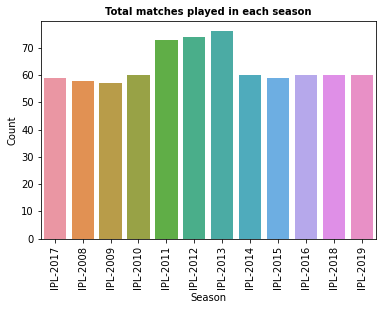

In [ ]:
# Finding total number of matches played in each season by creating a bar plot without creating new dataframe using seaborn library 
sns.countplot(final_matches['Season'])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")

In [ ]:
# Renaming the col 'match_id' in final_deli to 'id' for merging
final_deli = final_deli.rename(columns = {"match_id":"id"})


In [ ]:
# Adding column 'Season' to final_deli by merging with final_matches with common column named 'id'
season_data=final_matches[['id','Season']].merge(final_deli, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()

,Season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,IPL-2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,IPL-2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,IPL-2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,IPL-2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,IPL-2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [ ]:
# Finding total runs scored in each season by grouping them and stored in new DF called 'season'
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()

In [ ]:
season

,Season,total_runs
0,IPL-2008,17937
1,IPL-2009,16353
2,IPL-2010,18883
3,IPL-2011,21154
4,IPL-2012,22453
5,IPL-2013,22602
6,IPL-2014,18931
7,IPL-2015,18353
8,IPL-2016,18862
9,IPL-2017,18786


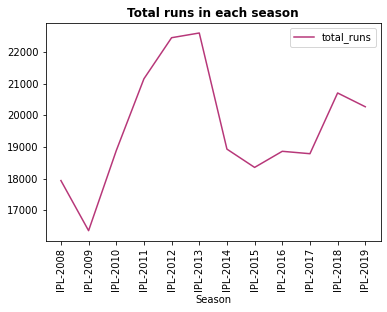

In [ ]:
# Visualizing the total runs scored in each season with the help of line season
S=season.set_index('Season')
sns.lineplot(data=S,palette="magma") 
plt.xticks(rotation=90,fontsize=10)
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [ ]:
runs_per_match=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_match

,Season,matches,total_runs
0,IPL-2008,58,17937
1,IPL-2009,57,16353
2,IPL-2010,60,18883
3,IPL-2011,73,21154
4,IPL-2012,74,22453
5,IPL-2013,76,22602
6,IPL-2014,60,18931
7,IPL-2015,59,18353
8,IPL-2016,60,18862
9,IPL-2017,59,18786


In [ ]:
# Finding average runs scored per match
runs_per_match['Runs scored per match']=runs_per_match['total_runs']/runs_per_match['matches']
runs_per_match

,Season,matches,total_runs,Runs scored per match
0,IPL-2008,58,17937,309.258621
1,IPL-2009,57,16353,286.894737
2,IPL-2010,60,18883,314.716667
3,IPL-2011,73,21154,289.780822
4,IPL-2012,74,22453,303.418919
5,IPL-2013,76,22602,297.394737
6,IPL-2014,60,18931,315.516667
7,IPL-2015,59,18353,311.067797
8,IPL-2016,60,18862,314.366667
9,IPL-2017,59,18786,318.406780


In [ ]:
toss=final_matches['toss_winner'].value_counts()

In [ ]:
toss

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

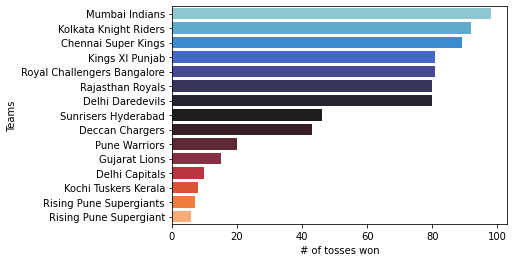

In [ ]:
# Visualization of a number of teams won the toss
sns.barplot(y=toss.index, x=toss, orient='h',palette="icefire",saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

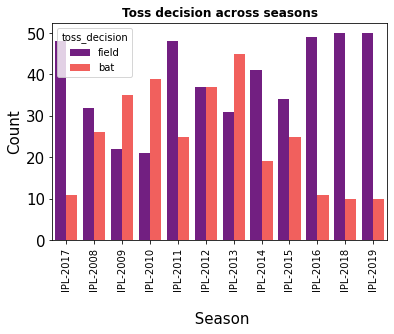

In [ ]:
# Visualization of decisions made after winning the toss across all seasons
sns.countplot(x='Season', hue='toss_decision', data=final_matches,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()

In [ ]:

#Extracting the records where a team won batting first
batting_first=final_matches[final_matches['win_by_runs']!=0]

In [ ]:
#Looking at the head
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


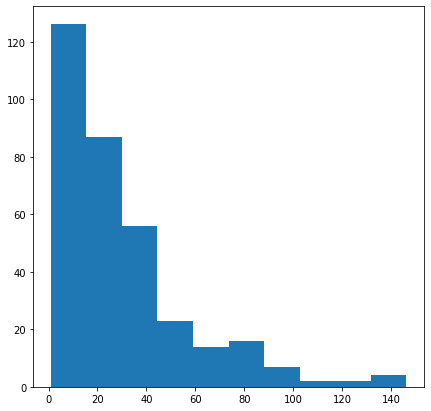

In [ ]:
#Making a histogram for seeing data distribution for teams winning by runs
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.show()

In [ ]:
#Finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

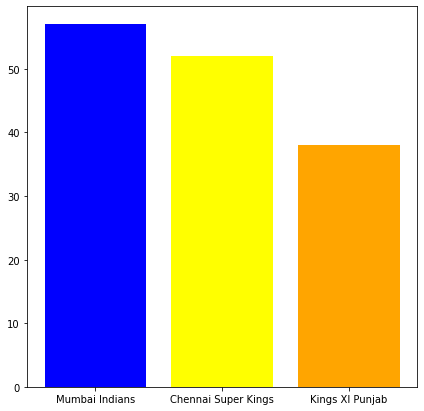

In [ ]:
# Visualizing of top 3 teams who won after batting first by winning a toss
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

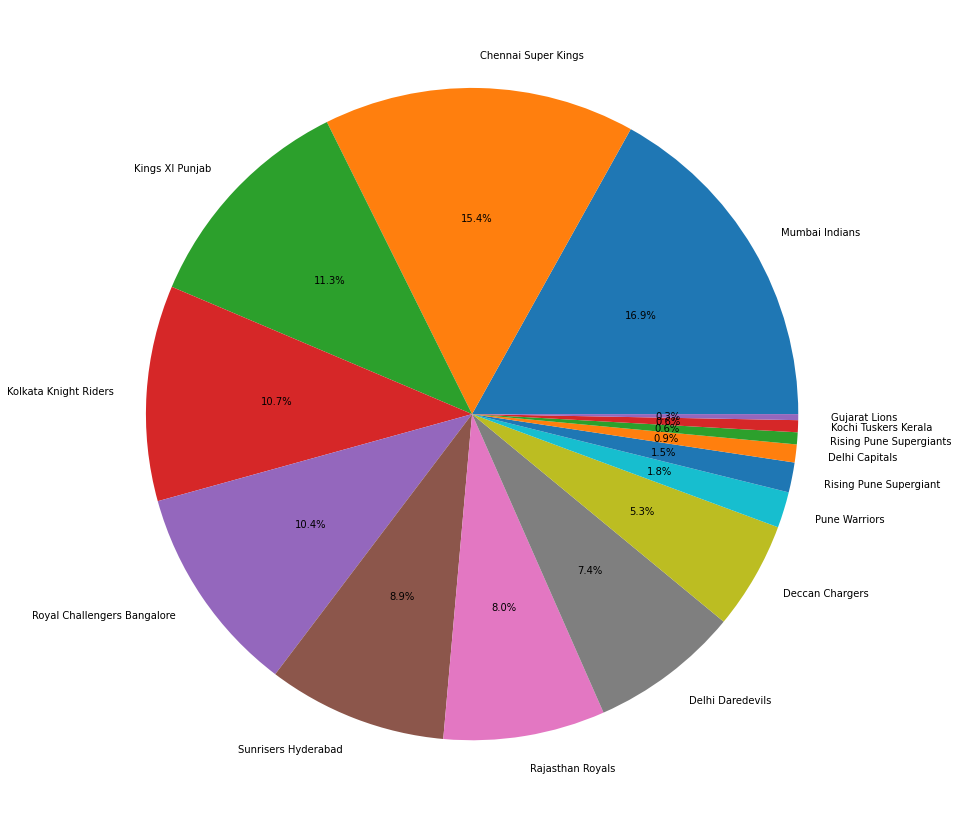

In [ ]:
#Making a pie chart for checking the winning percentage
plt.figure(figsize=(15,15))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
#extracting those records where a team has won after batting second
batting_second=final_matches[final_matches['win_by_wickets']!=0]
batting_second.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


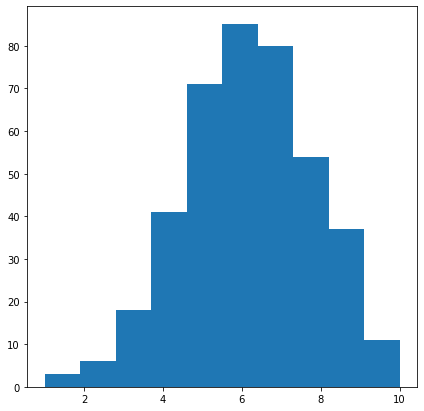

In [ ]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'])
plt.show()

In [ ]:
#Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

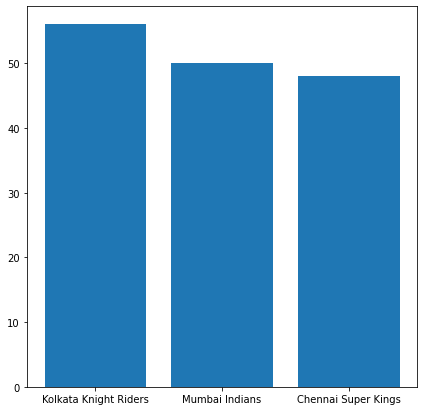

In [ ]:
#Making a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]))
plt.show()

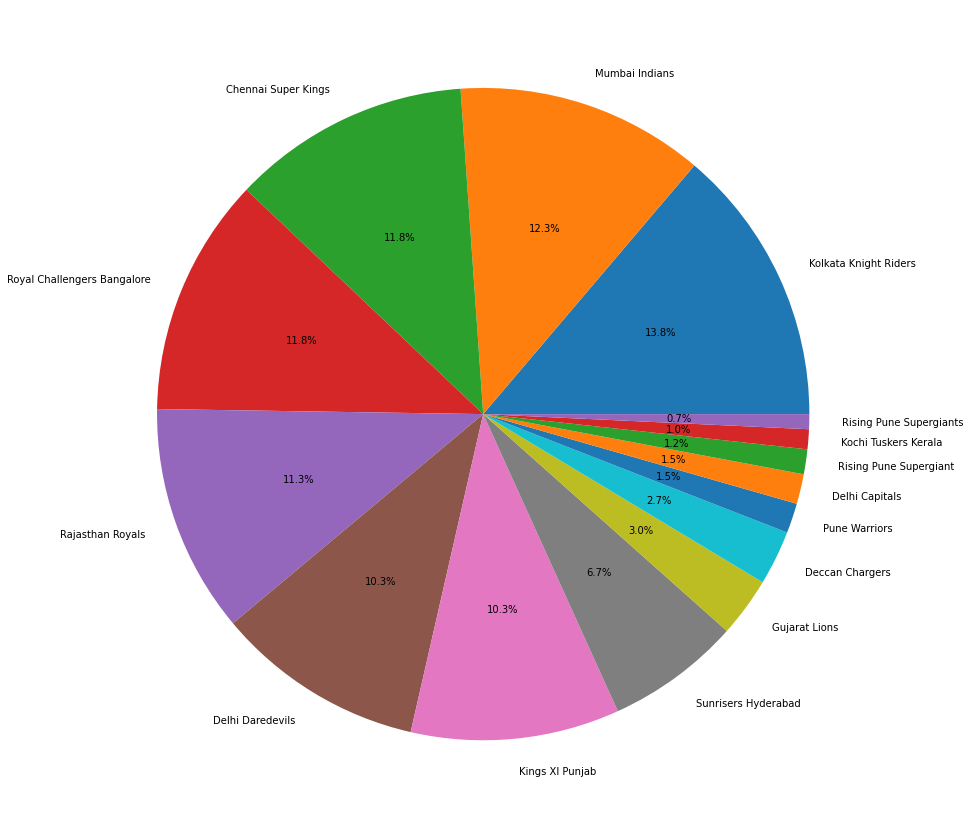

In [ ]:
#Making a pie chart for winning percentage distribution of most wins after batting second
plt.figure(figsize=(15,15))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
#Looking at the number of matches played in each city
final_matches['city'].value_counts()

Mumbai            108
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
# Experimenting to see get the name of stadium where Mumbai Indians won the toss
final_matches.venue[final_matches.toss_winner=='Mumbai Indians'][final_matches.winner=='Mumbai Indians'].mode()


0    Wankhede Stadium
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


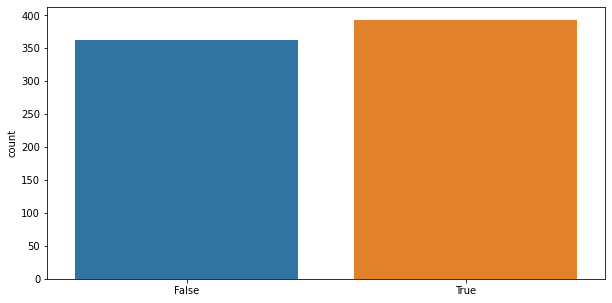

In [ ]:
# Getting a distribution of boolean value if team won the toss and match both
toss1 = final_matches['toss_winner'] == final_matches['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


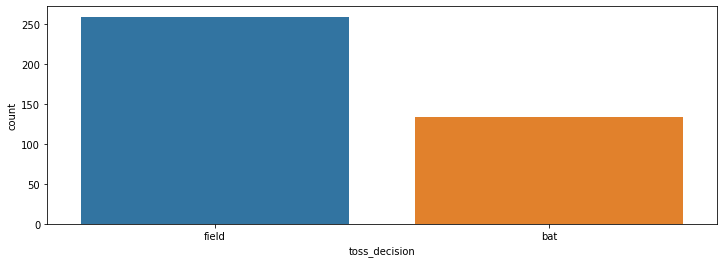

In [ ]:
# Getting the distribution what the team chose (Bowl or Bat) after winning the toss and they won the match also
plt.figure(figsize=(12,4))
sns.countplot(final_matches.toss_decision[final_matches.toss_winner == final_matches.winner])
plt.show()

In [ ]:
#Analysing single player considering "RG Sharma"
player = (final_deli['batsman']=='RG Sharma')
df_rohit=final_deli[player]
df_rohit.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
275,2,1,Mumbai Indians,Rising Pune Supergiants,5,3,RG Sharma,JC Buttler,Imran Tahir,0,0,0,0,0,0,0,0,0
276,2,1,Mumbai Indians,Rising Pune Supergiants,5,4,RG Sharma,JC Buttler,Imran Tahir,0,0,0,0,0,0,1,0,1
278,2,1,Mumbai Indians,Rising Pune Supergiants,5,6,RG Sharma,JC Buttler,Imran Tahir,0,0,0,0,0,0,1,0,1
279,2,1,Mumbai Indians,Rising Pune Supergiants,6,1,RG Sharma,JC Buttler,DL Chahar,0,0,0,0,0,0,1,0,1
285,2,1,Mumbai Indians,Rising Pune Supergiants,7,1,RG Sharma,JC Buttler,Imran Tahir,0,0,0,0,0,0,0,0,0


In [ ]:
# Getting the bowler RG sharma faced the most
df_rohit['bowler'].value_counts().head(10)


PP Chawla      113
SP Narine      111
UT Yadav        97
R Ashwin        94
A Mishra        85
DJ Bravo        75
RA Jadeja       74
M Morkel        69
P Kumar         63
Imran Tahir     63
Name: bowler, dtype: int64

In [ ]:
# Defining the function to find the runs scored by:
def count(df_rohit,runs):
    return len(df_rohit[df_rohit['batsman_runs']==runs])*runs

In [ ]:
df_rohit['batsman_runs'].unique()

array([0, 1, 3, 2, 4, 6, 5, 7])

In [ ]:
# Printing the total number of runs by each of the category found above
print("Runs scored from 1's :",count(df_rohit,1))
print("Runs scored from 2's :",count(df_rohit,2))
print("Runs scored from 3's :",count(df_rohit,3))
print("Runs scored from 4's :",count(df_rohit,4))
print("Runs scored from 5's :",count(df_rohit,5))
print("Runs scored from 6's :",count(df_rohit,6))
print("Runs scored from 7's :",count(df_rohit,7))

Runs scored from 1's : 1589
Runs scored from 2's : 410
Runs scored from 3's : 15
Runs scored from 4's : 1724
Runs scored from 5's : 5
Runs scored from 6's : 1164
Runs scored from 7's : 7


In [ ]:
# Getting the record where team won by maximum number of runs
final_matches[final_matches['win_by_runs']==final_matches['win_by_runs'].max()]


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [ ]:
# Finding the runs scored by each player 
runs = final_deli.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs


,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [ ]:
# Finding top 10 batsman scored highest runs
runs.columns = ['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending = False).head(10).reset_index().drop('index', axis=1)
y

,Batsman,runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

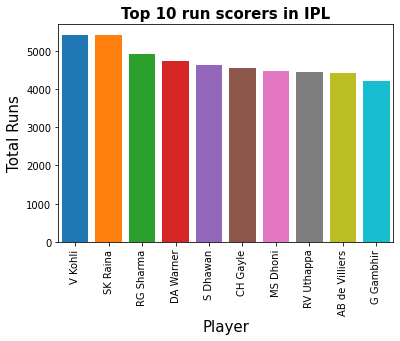

In [ ]:
# Visualizing top 10 batsman scored highest runs
sns.barplot(x=y['Batsman'],y=y['runs'],saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title('Top 10 run scorers in IPL',fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'Highest MOM award winners')

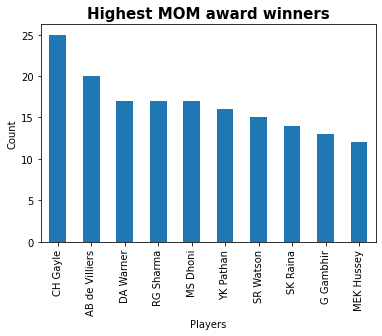

In [ ]:
# Visualizing top 10 batsman with highest number Man of the Match award

final_matches.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Highest MOM award winners",fontsize=15,fontweight="bold")

In [ ]:
# ---------------------------------------------------------------------------------END-----------------------------------------------------------------------------------------